In [24]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum

<h1> Butterworth Filters </h1>

In this notebook, we perform some calculations to learn about Butterworth filters, including my own implementations of some digital butterworth filters and comparing to other implementations in python standard libraries.

<h2> History </h2>

The Butterworth filter was originally published in a 1930 paper by the physicist Stephen Butterworth in an attempt to simplify the construction of electric filters, which up until that point was usually done as almost an art - components were selected carefully and changed out until the desired filter performance was achieved. 

The original paper itself is pretty readable by today's standards and I highly recommend just giving the original a read in you have the chance:
[On the Theory of Filter Amplifiers](https://www.changpuak.ch/electronics/downloads/On_the_Theory_of_Filter_Amplifiers.pdf)

In [33]:
class FilterTypes(Enum):
    LOWPASS = 1
    HIGHPASS = 2
    BANDPASS = 3
    BANDSTOP = 4
    

def plot_filter(filter_, min_freq, max_freq, n=1000, phase=False, group_delay=False):
    """
    
    """
    f = np.logspace(np.log10(min_freq), np.log10(max_freq), n)
    response = filter_.frequency_response(f)
    plt.semilogx(f, 20 * np.log10(abs(response)))
    plt.title(f'Frequency response from {filter_}')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.show()
    

class Filter():
    
    f_response = None # Should be a lambda defining the response function of the filter
    
    def __init__(self):
        raise NotImplementedError
        
    def frequency_response(self, f):
        """
        Frequency response of filter at particular frequency or set of frequencies
        """
        return self.f_resp(f)
        
    
    def fir(self, N, window):
        """
        Return FIR implementation of the filter
        """
        pass
    
    
class ButterworthFilter(Filter):

    def __init__(self, f_c, N, filter_type, bandwidth = None):
        """
        f_c: Cutoff frequency of filter . If filter type is Bandpass or Bandstop, this should
            be the center frequency of the filter
        N: Order of filter
        
        """
        assert filter_type in FilterTypes
        if filter_type in [FilterTypes.BANDPASS, FilterTypes.BANDSTOP]:
            assert bandwidth is not None
        self._fir = None
        self.N = N
        self.f_c = f_c
        
        if filter_type is FilterTypes.LOWPASS:
            self.f_resp = lambda f: 1/np.sqrt(1 + (f/f_c)**(2*self.N))
        
    def __repr__(self):
        return f'{self.N}th Order Butterworth Filter, f_c = {self.f_c}'
        

    
class ChebyshevyFilter(Filter):
    
    def __init__(self, filter_type, bandwidth=)
        
    


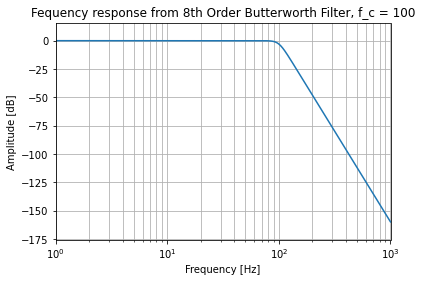

In [40]:
# Filter implemented as an FIR
N = 512  # Number of points in 
m = 4 # Order of filter
f_c = 100# Desired Cutoff frequency of filter 
f_s = 20 # sampling rate

f = np.linspace(-np.pi*f_s, np.pi*f_s, N)
b = ButterworthFilter(f_c, 8, FilterTypes.LOWPASS)
plot_filter(b, 1, 1000)